# Recommendation System for book dataset


# Problem statement.

***Build a recommender system by using cosine simillarties score.***






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
book_df = pd.read_csv('book.csv',encoding='latin-1')
book_df.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [3]:
book_df['Book.Title'].head(10)

0                                  Classical Mythology
1                                         Clara Callan
2                                 Decision in Normandy
3    Flu: The Story of the Great Influenza Pandemic...
4                               The Mummies of Urumchi
5                               The Kitchen God's Wife
6    What If?: The World's Foremost Military Histor...
7                                      PLEADING GUILTY
8    Under the Black Flag: The Romance and the Real...
9              Where You'll Find Me: And Other Stories
Name: Book.Title, dtype: object

# EDA for book dataset

In [4]:
book_df.shape

(10000, 4)

In [5]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
book_df.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [7]:
book_df.columns

Index(['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating'], dtype='object')

In [8]:
#we can drop 'Unnamed: 0' columns as it is not useful.Creating copy of current dataset
book_df_bk = book_df.copy()

In [9]:
#Droping Unnamed: 0 column
book_df = book_df.drop(['Unnamed: 0'],axis=1)

In [10]:
book_df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [11]:
#converting column names in camel case
book_df.rename({'User.ID':'userId','Book.Title':'title','Book.Rating':'rating'}, axis=1,inplace=True)
book_df

,userId,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [12]:
#number of unique users in the dataset
len(book_df.userId.unique())

2182

In [13]:
#number of unique books in the dataset
len(book_df.title.unique())

9659

<AxesSubplot:xlabel='userId', ylabel='Count'>

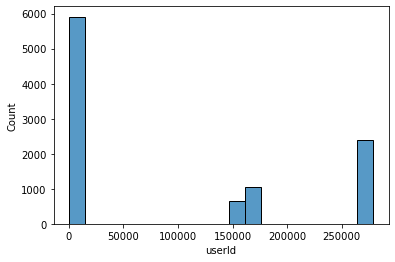

In [14]:
sns.histplot(book_df['userId'])

In [15]:
book_df['userId'].value_counts()

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: userId, Length: 2182, dtype: int64

In [16]:
book_df[book_df['userId']==4017]

,userId,title,rating
7823,4017,"Absalom, Absalom!: The Corrected Text (Vintage...",10
7824,4017,Nothing's Fair in Fifth Grade,9
7825,4017,The Signet Classic Book of Southern Short Stories,10
7826,4017,Pleasing the Ghost,8
7827,4017,The Gift of the Pirate Queen,9
...,...,...,...
7974,4017,Fluir (Flow) Una Psicologia de La Felicidad,9
7975,4017,El Arte de Amargarse La Vida,5
7976,4017,El libro de los seres imaginarios (Narradores ...,8
7977,4017,La Practica de La Meditacion,5


In [17]:
book_df['title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: title, Length: 9659, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Count'>

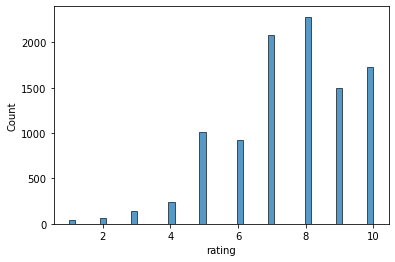

In [18]:
sns.histplot(book_df['rating'])

# Books with rating 8 are maximum.

In [19]:
#So,rating is from 1 to 10

In [20]:
book_df['rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

In [21]:
#Books with highes ratings
book_df[book_df['rating']>9]

,userId,title,rating
6,276745,What If?: The World's Foremost Military Histor...,10
16,276760,More Cunning Than Man: A Social History of Rat...,10
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
34,276788,Sturmzeit. Roman.,10
...,...,...,...
9958,162052,HOUSE OF MIRTH,10
9967,162052,The Man Who Ate the 747,10
9968,162052,Women of Mystery,10
9969,162054,The Maggody Militia: An Arly Hanks Mystery (Ar...,10


In [22]:
#Books with highest Rating
book_df[book_df['rating']>9].value_counts()

userId  title                                                               rating
12      Apocalypse Wow                                                      10        1
161252  The Wise And Foolish Virgins                                        10        1
161385  One Hundred and Eighty-Seven Ways to Amuse a Bored Cat              10        1
        Into the Tangle of Friendship : A Memoir of the Things That Matter  10        1
161373  Army Brat: A Memoir                                                 10        1
                                                                                     ..
2134    To Tame a Highland Warrior                                          10        1
        The Wife Test                                                       10        1
        Crystal Flame                                                       10        1
2110    Zen Meditations on Being a Mother (Zen Meditations)                 10        1
278851  The Year's Best Horror Storie

In [23]:
#There are 1732 books with rating 10

In [24]:
#Books with lowest ratings
book_df[book_df['rating']<2]

,userId,title,rating
115,276853,A Kiss Remembered,1
640,277363,Children of the Night,1
1442,278024,Saucer,1
1717,278202,Catechism of the Catholic Church,1
2107,278540,Anam Cara : A Book of Celtic Wisdom,1
2231,278633,The Selfish Gene,1
2294,278683,Having Our Say: The Delany Sisters' First 100 ...,1
2320,278755,"The Elements of Style, Fourth Edition",1
2321,278759,How to Say It Style Guide,1
3900,1314,Fatal Care,1


In [25]:
#counts of Books with lowest ratings
book_df[book_df['rating']<2].value_counts()

userId  title                                                                                                   rating
1314    Fatal Care                                                                                              1         1
161968  Pretty in Pink                                                                                          1         1
4134    Justice: Crimes, Trials, and Punishments                                                                1         1
4149    Innocence                                                                                               1         1
        Middle Age: A Romance                                                                                   1         1
4164    Ugly American                                                                                           1         1
161041  Adolf, Hitler                                                                                           1         1
161068  THIS 

In [26]:
book_df.sort_values(by='userId',ascending=True).head(20)

,userId,title,rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2406,9,The Book of Kells: Selected Plates in Full Color,6
2407,10,SINGLE &amp; SINGLE,6
2408,12,Apocalypse Wow,10


In [27]:
book_df.sort_values(by='userId',ascending=True).tail(30)

,userId,title,rating
2355,278843,Murder on the Orient Express (Hercule Poirot M...,8
2354,278843,Adventures of Huckleberry Finn,7
2353,278843,The Mighty,9
2362,278843,Midnight Masquerade,10
2375,278844,The Berlin Stories: The Last of Mr. Norris and...,6
2373,278844,Icebound,6
2374,278844,Young Wives,7
2376,278846,Man's Search For Meaning,8
2377,278849,The Kitchen God's Wife (Vintage Contemporaries),9
2386,278851,The Celestine Prophecy : An Experiential Guide,5


In [28]:
book_df.sort_values(by='rating',ascending=False).head(20)

,userId,title,rating
7785,3943,The Bunyans,10
2318,278750,Sit &amp; Solve - Lateral Thinking Puzzles,10
2325,278772,Feeling Good : The New Mood Therapy,10
5634,2453,O Little Town Of Glory (Men Of Glory) (Harleq...,10
2340,278807,Women Can't Hear What Men Don't Say: Destroyin...,10
2341,278818,Northanger Abbey (Bantam Classic),10
2348,278831,Jerk on One End: Reflections of a Mediocre Fis...,10
2349,278832,Prize the Epic Quest for Oil Money and Pow,10
2350,278832,DEVIL IN A BLUE DRESS (Easy Rawlins Mysteries ...,10
2351,278832,The Sum of All Fears (Jack Ryan Novels),10


In [29]:
book_df.sort_values(by='rating',ascending=True).head(20)

,userId,title,rating
4337,1733,Welcome to the Funny Farm: The All-True Misadv...,1
4540,1903,Mrs. Mike,1
640,277363,Children of the Night,1
6144,2985,Groom For Maggie (Whirlwind Weddings) (Silhoue...,1
4523,1903,Selected Poems,1
4231,1674,Cars and Trucks and Things That Go,1
1717,278202,Catechism of the Catholic Church,1
8143,4164,Ugly American,1
8588,161068,THIS SIDE OF PARADISE (A Scribner Classic),1
1442,278024,Saucer,1


In [30]:
book_df.rating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

# Creating Pivot Table for Book dataset

In [31]:
book_df.columns

Index(['userId', 'title', 'rating'], dtype='object')

In [32]:
book_pivot_df = book_df.pivot_table(index='userId', columns='title', values='rating').reset_index(drop=True)
book_pivot_df.head(30)

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
book_pivot_df.shape

(2182, 9659)

In [34]:
book_pivot_df.index = book_df.userId.unique()
book_pivot_df

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Impute those NaNs with 0 values
book_pivot_df.fillna(0, inplace=True)
book_pivot_df.head()

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
book_pivot_df.tail()

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Calculating Cosine Similarity between Users

In [38]:
user_sim_book = 1 - pairwise_distances(book_pivot_df.values,metric='cosine')
user_sim_book

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Replacing diagonal 1 value with 0

In [39]:
np.fill_diagonal(user_sim_book, 0)
user_sim_book

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
#Store the results in a dataframe
user_sim_book_df = pd.DataFrame(user_sim_book)

In [41]:
#Set the index and column names to user ids 
user_sim_book_df.index = book_df.userId.unique()
user_sim_book_df.columns = book_df.userId.unique()

In [42]:
user_sim_book_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
user_sim_book_df.iloc[100:120, 0:20]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796
277053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
user_sim_book_df.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
dtype: int64

In [49]:

book_df[(book_df['userId']==276729) | (book_df['userId']==276726)]

,userId,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [51]:
book_df[(book_df['userId']==276736) | (book_df['userId']==276726)]

,userId,title,rating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [53]:
book_df[(book_df['userId']==276737) | (book_df['userId']==276726)]

,userId,title,rating
0,276726,Classical Mythology,5
4,276737,The Mummies of Urumchi,6


In [54]:
book_df[(book_df['userId']==276744) | (book_df['userId']==276726)]

,userId,title,rating
0,276726,Classical Mythology,5
5,276744,The Kitchen God's Wife,7


In [55]:
def recommend(userId):
    simID = user_sim_book_df.loc[userId].idxmax()
    simID_books = book_df[book_df['userId'] == simID].title
    userId_books = book_df[book_df['userId'] == userId].title
    return set(simID_books) - set(userId_books)

In [57]:
book_df[book_df['userId']==276736]

,userId,title,rating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [61]:
recommend(276736)

{'Classical Mythology'}

In [62]:
book_df[book_df['title']=='Classical Mythology']

,userId,title,rating
0,276726,Classical Mythology,5


In [64]:
book_df[book_df['userId']==276737]

,userId,title,rating
4,276737,The Mummies of Urumchi,6


In [65]:
recommend(276737)

{'Classical Mythology'}

In [67]:
book_df[book_df['userId']==276748]

,userId,title,rating
12,276748,The Middle Stories,6


In [68]:
recommend(276748)

{'Best Little Word Book Ever! (Little Golden Book)',
 'Busiest Firefighters Ever! (Little Golden Book)',
 'Cookie Monster/Cookie Tree',
 'Do You Know?',
 "Grover's Own Alphabet",
 "I Think That It is Wonderful: Featuring Jim Henson's Sesame Street Muppets (Little Golden Book)",
 "IF YOU'RE AFRAID OF DARK",
 'Kat Kong',
 'My Little Golden Book of Cars and Trucks (Little Golden Book)',
 'Pooh Trick or Treat! (Little Golden Books)',
 'The Biggest Pumpkin Ever',
 'The Monster at the End of This Book',
 'The Twelve Dancing Princesses: A Folk Tale from the Brothers Grimm (Easy to Read Folktale)',
 'The good-by day (A Little golden book)'}

In [70]:
book_df[book_df['title']=='Best Little Word Book Ever! (Little Golden Book)']

,userId,title,rating
9199,161677,Best Little Word Book Ever! (Little Golden Book),10


In [ ]:
book_df